In [1]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
imdb = keras.datasets.imdb

Using TensorFlow backend.


In [0]:
VOCAB_SIZE = 10000

In [3]:
INDEX_FROM = 3 #EDITED
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=VOCAB_SIZE,index_from=INDEX_FROM)

17465344/17464789 [==============================] - 2s 0us/step


In [4]:
print('\n Sample label:', test_labels[1])


 Sample label: 1


In [5]:
print('Sample review:', train_data[0])

Sample review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
from keras.preprocessing.sequence import pad_sequences
MAXIMUM_LENGTH = 500
preprocessed_train_data = pad_sequences(train_data,maxlen=MAXIMUM_LENGTH)
processed_test_data = pad_sequences(test_data,maxlen=MAXIMUM_LENGTH)

In [7]:
 print('Length of sample train_data before preprocessing:', len(train_data[1]))

Length of sample train_data before preprocessing: 189


In [8]:
print('Length of sample train_data after preprocessing:', len(preprocessed_train_data[0]))

Length of sample train_data after preprocessing: 500


In [9]:
model = Sequential()
EMBED_SIZE = 100
# model.add()
model.add(Embedding(VOCAB_SIZE,EMBED_SIZE,input_length=MAXIMUM_LENGTH))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(1,activation='sigmoid',input_shape=(1,)))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
None


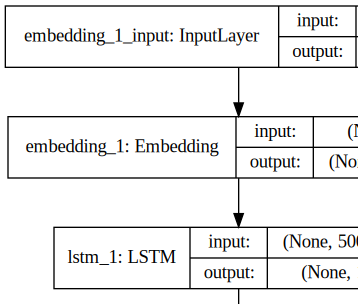

In [11]:
# from keras.utils import plot_mode
from IPython.display import SVG
from keras.utils import vis_utils
SVG(vis_utils.model_to_dot(model, show_shapes=True, show_layer_names=True).create(prog='dot', format='svg'))

In [12]:
history = model.fit(preprocessed_train_data,
                    train_labels,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.08,
                    verbose=1)




Train on 23000 samples, validate on 2000 samples
Epoch 1/10





23000/23000 [==============================] - 52s 2ms/step - loss: 0.6433 - acc: 0.6554 - val_loss: 0.6099 - val_acc: 0.6995
Epoch 2/10
23000/23000 [==============================] - 42s 2ms/step - loss: 0.5050 - acc: 0.7875 - val_loss: 0.4170 - val_acc: 0.8100
Epoch 3/10
23000/23000 [==============================] - 43s 2ms/step - loss: 0.2991 - acc: 0.8759 - val_loss: 0.3310 - val_acc: 0.8580
Epoch 4/10
23000/23000 [==============================] - 43s 2ms/step - loss: 0.2188 - acc: 0.9197 - val_loss: 0.3185 - val_acc: 0.8860
Epoch 5/10
23000/23000 [==============================] - 44s 2ms/step - loss: 0.1620 - acc: 0.9427 - val_loss: 0.3233 - val_acc: 0.8905
Epoch 6/10
23000/23000 [==============================] - 43s 2ms/step - loss: 0.1311 - acc: 0.9570 - val_loss: 0.3288 - val_acc: 0.8770
Epoch 7/10
23000/23000 [==============================] - 43s 2ms/step - loss: 0.1054 - acc: 0.9659 - val_loss: 0.3555 - 

In [15]:
results = model.evaluate(processed_test_data, test_labels)

25000/25000 [==============================] - 284s 11ms/step


In [16]:
print(results)
# loss, accuracay 

[0.5137384263324738, 0.85528]


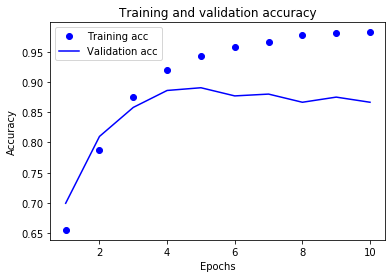

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()